In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
#Data Import
real_data=pd.read_csv(join('data','national_fire_information_2017.csv'), encoding='CP949')
real_data.head(2) #table로 보여주어 직관적이다.

C:\Users\Una\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (122,129,136,165,182,195) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,연번,조사서번호,사망,부상,인명피해(명)소계,재산피해소계,시도본부,소방서,119안전센터,119지역대,...,지번동,지번리,출동소요시,출동소요분,출동소요초,그을음면적,차량발화지점,위험물_가스제조소등_완공일,위험물_가스제조소등_발화지점,선박항공기구분
0,1,'170101044118025,0,0,0,13391,서울소방재난본부,강남소방서,영동119안전센터,NaN,...,논현1동,NaN,0,6,29,40.0,NaN,NaN,NaN,NaN
1,2,'170101010314566,0,0,0,195,경북소방본부,문경소방서,점촌119안전센터,NaN,...,점촌3동,NaN,0,9,14,80.0,NaN,NaN,NaN,NaN


## data preprocessing

In [151]:
#dp = real_data[['재산피해소계','출동소요시간', '화재진압시간', '소방서거리(㎞)', '소실면적(㎡)','온도(℃)','습도','풍향','그을음면적']]
dp = real_data[['재산피해소계','출동소요시간', '화재진압시간', '소실면적(㎡)','그을음면적','온도(℃)','습도','풍향']]
dp.head(5)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),습도,풍향
0,13391,0:06:29,0:15:00,10.0,40.0,0.0,0.0,NONE
1,195,0:09:14,0:04:03,0.0,80.0,0.0,0.0,NONE
2,22,0:09:26,0:49:05,NaN,NaN,3.0,79.0,0~4 m/s
3,1,0:06:50,0:00:02,0.0,0.0,-1.4,99.0,0~4 m/s
4,966,0:01:55,0:00:00,7.0,43.0,0.6,99.0,0~4 m/s


In [152]:
dp['재산피해소계'].value_counts()

0        3919
110       560
11        502
55        483
50        323
         ... 
98077       1
38688       1
7985        1
3891        1
2047        1
Name: 재산피해소계, Length: 10765, dtype: int64

In [168]:
a = dp.loc[dp['재산피해소계']<= 1000000, '재산피해소계']
print(a.shape[0])

b = dp.loc[(dp['재산피해소계']> 1000000) & (dp['재산피해소계']<= 2000000), '재산피해소계']
print(b.shape[0])

c = dp.loc[(dp['재산피해소계']> 2000000) & (dp['재산피해소계']<= 3000000), '재산피해소계']
print(c.shape[0])

d = dp.loc[(dp['재산피해소계']> 3000000) & (dp['재산피해소계']<= 4000000), '재산피해소계']
print(d.shape[0])

e = dp.loc[(dp['재산피해소계']> 4000000) & (dp['재산피해소계']<= 5000000), '재산피해소계']
print(e.shape[0])

f = dp.loc[(dp['재산피해소계']> 5000000) & (dp['재산피해소계']<= 6000000), '재산피해소계']
print(f.shape[0])

g = dp.loc[(dp['재산피해소계']> 6000000) & (dp['재산피해소계']<= 7000000), '재산피해소계']
print(g.shape[0])

h = dp.loc[(dp['재산피해소계']> 7000000) & (dp['재산피해소계']<= 8000000), '재산피해소계']
print(h.shape[0])

i = dp.loc[(dp['재산피해소계']> 8000000), '재산피해소계']
print(i.shape[0])

44110
47
10
4
3
0
2
0
2


In [116]:
dp['재산피해소계'].sort_values()

11600          0
11121          0
33509          0
11126          0
23925          0
          ...   
15772    4501168
32184    6070382
18080    6693391
11654    8285507
4479     8323780
Name: 재산피해소계, Length: 44178, dtype: int64

In [117]:
print(dp.isnull().sum())

재산피해소계         0
출동소요시간         0
화재진압시간         0
소실면적(㎡)    13492
그을음면적      15802
온도(℃)          1
습도             0
풍향             0
dtype: int64


In [171]:
dp1 = dp.loc[(dp['재산피해소계']<= 3000000)]
dp1.head(5)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),습도,풍향
0,13391,0:06:29,0:15:00,10.0,40.0,0.0,0.0,NONE
1,195,0:09:14,0:04:03,0.0,80.0,0.0,0.0,NONE
2,22,0:09:26,0:49:05,NaN,NaN,3.0,79.0,0~4 m/s
3,1,0:06:50,0:00:02,0.0,0.0,-1.4,99.0,0~4 m/s
4,966,0:01:55,0:00:00,7.0,43.0,0.6,99.0,0~4 m/s


In [172]:
print(dp1.isnull().sum())

재산피해소계         0
출동소요시간         0
화재진압시간         0
소실면적(㎡)    13492
그을음면적      15801
온도(℃)          1
습도             0
풍향             0
dtype: int64


In [173]:
#온도 NAN값
dp1 = dp1.dropna(subset=['온도(℃)'])

dp1['습도(%)'] = pd.to_numeric(dp1['습도'])/100
del dp1['습도']

In [174]:
#소실면적 NAN값
#dp.dropna(subset=['소실면적(㎡)'])
#그을음면적 NAN값
#dp1=dp1.fillna(0)
#dp1.head(5)

In [175]:
dp1 = dp1.dropna(subset=['소실면적(㎡)'])
dp1 = dp1.dropna(subset=['그을음면적'])
dp1 = dp1.drop(dp1[(dp1['소실면적(㎡)'] == 0.0)&(dp1['그을음면적'] == 0.0)].index)
dp1.head(5)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍향,습도(%)
0,13391,0:06:29,0:15:00,10.0,40.0,0.0,NONE,0.00
1,195,0:09:14,0:04:03,0.0,80.0,0.0,NONE,0.00
4,966,0:01:55,0:00:00,7.0,43.0,0.6,0~4 m/s,0.99
5,3638,0:08:39,0:02:41,3.3,0.0,-0.7,0~4 m/s,0.35
8,19,0:05:35,0:00:00,0.0,0.2,-2.0,NONE,0.00


In [176]:
print(dp1.isnull().sum())

재산피해소계     0
출동소요시간     0
화재진압시간     0
소실면적(㎡)    0
그을음면적      0
온도(℃)      0
풍향         0
습도(%)      0
dtype: int64


In [177]:
#출동소요시간 초단위로 변환
dp1[['h', 'm', 's']] = dp1['출동소요시간'].str.split(":", expand=True)
dp1['출동소요시간']= pd.to_numeric(dp1['h']) *360 + pd.to_numeric(dp1['m']) *60 + pd.to_numeric(dp1['s'])
dp1.head(3)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍향,습도(%),h,m,s
0,13391,389,0:15:00,10.0,40.0,0.0,NONE,0.00,0,06,29
1,195,554,0:04:03,0.0,80.0,0.0,NONE,0.00,0,09,14
4,966,115,0:00:00,7.0,43.0,0.6,0~4 m/s,0.99,0,01,55


In [178]:
#화재진압시간 초단위로 변환
dp1[['h', 'm', 's']] = dp1['화재진압시간'].str.split(":", expand=True)
dp1['화재진압시간']= pd.to_numeric(dp1['h']) *360 + pd.to_numeric(dp1['m']) *60 + pd.to_numeric(dp1['s'])

del dp1['h']
del dp1['m']
del dp1['s']

dp1.head(3)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍향,습도(%)
0,13391,389,900,10.0,40.0,0.0,NONE,0.00
1,195,554,243,0.0,80.0,0.0,NONE,0.00
4,966,115,0,7.0,43.0,0.6,0~4 m/s,0.99


In [179]:
#풍향 NONE, 0~4 m/s, 5~8 m/s, 9~12 m/s, 13~17 m/s, 18 m/s 이상 label로 구분
#연소속도,,,
#dp1.loc[dp1['풍향'] == 'NONE', '풍향'] = 0

dp1 = dp1.drop(dp1[(dp1['풍향'] == 'NONE')].index)

dp1.loc[dp1['풍향'] == '0~4 m/s', '풍향'] = 1
dp1.loc[dp1['풍향'] == '5~8 m/s', '풍향'] = 2
dp1.loc[dp1['풍향'] == '9~12 m/s', '풍향'] = 4
dp1.loc[dp1['풍향'] == '13~17 m/s', '풍향'] = 8
dp1.loc[dp1['풍향'] == '18 m/s 이상', '풍향'] = 16

dp1.head()

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍향,습도(%)
4,966,115,0,7.0,43.0,0.6,1,0.99
5,3638,519,161,3.3,0.0,-0.7,1,0.35
11,4281,913,2416,900.0,0.0,6.0,1,0.70
15,32750,277,1258,0.0,200.0,-3.0,1,0.94
19,971,300,478,1.0,2.0,0.0,1,0.85


In [180]:
## Same functions to explore data
print(dp1.corr())
print()
print(dp1.dtypes)
print()
print(dp1.shape)

           재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)     습도(%)
재산피해소계   1.000000  0.061607  0.249762  0.623908  0.122234 -0.026188  0.004434
출동소요시간   0.061607  1.000000  0.166316  0.099691 -0.024699 -0.080705 -0.000513
화재진압시간   0.249762  0.166316  1.000000  0.284098  0.092361 -0.086532  0.007156
소실면적(㎡)  0.623908  0.099691  0.284098  1.000000  0.087980 -0.031601 -0.004288
그을음면적    0.122234 -0.024699  0.092361  0.087980  1.000000 -0.000341  0.018658
온도(℃)   -0.026188 -0.080705 -0.086532 -0.031601 -0.000341  1.000000  0.065815
습도(%)    0.004434 -0.000513  0.007156 -0.004288  0.018658  0.065815  1.000000

재산피해소계       int64
출동소요시간       int64
화재진압시간       int64
소실면적(㎡)    float64
그을음면적      float64
온도(℃)      float64
풍향          object
습도(%)      float64
dtype: object

(17514, 8)


In [181]:
## Train-Valiedation Split
## Index control by yourself

n_data = dp1.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,n_data))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

# Train:Test = 7:3으로 맞춰주기위해 수동으로 작업을 해줌
# 우선 Train Test의 개수를 계산한 후
# Random Permutation을 통해
# index를 계산해줌

17514 12260 5254
[ 6750  2981 13635 ... 15749 10654  5545]
12260 5254


In [182]:
# 계산된 index에 맞춰 데이터 분할
trnx = dp1.iloc[idx_trn,1:]
trny = dp1.iloc[idx_trn,0]
tstx = dp1.iloc[idx_tst,1:]
tsty = dp1.iloc[idx_tst,0]

## Linear Regression

In [183]:
# Resgression Learning
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[-1926.39137239 -4966.50568455 82427.85990039 ... 36469.34980779
 -3966.36011914 16459.45563457]


In [184]:
np.sqrt(np.mean((np.square(lr_pred - tsty))))

79999.54173758812

In [185]:
print(tsty - lr_pred)

35493     2280.391372
32745     5043.505685
9141    -61021.859900
39719    -5249.886658
2927     -2839.786624
             ...     
8842    -28341.095299
22516    89194.138340
40699    13084.650192
29171     4309.360119
15026   -11377.455635
Name: 재산피해소계, Length: 5254, dtype: float64


[2.68145641e+13]


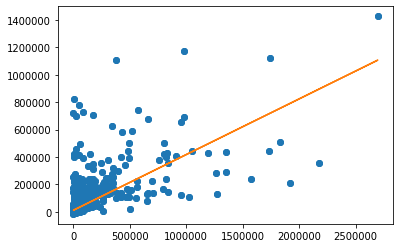

In [186]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred)
plt.plot(tsty,lr_pred,'o')
m,b = np.polyfit(tsty,lr_pred,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred))

In [138]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred))
print('R2:',metrics.r2_score(tsty, lr_pred))

RMSE: 48700.71281760719
MAE: 14346.553117549282
R2: 0.4296223135938978


In [139]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print(lr_pred_lasso)

[5172.42343781 1764.50494253 -355.48015184 ... 4972.14965466 6536.43238666
 2196.01564017]


In [140]:
np.sqrt(np.mean((np.square(lr_pred_lasso - tsty))))

48700.775363126275

In [141]:
print(tsty - lr_pred_lasso)

37277    -5076.423438
17126    -1488.504943
34866      855.480152
18077    39131.195174
14470   -14882.915559
             ...     
3455      -417.260006
20844      952.441805
38571    -3304.149655
14229    -6228.432387
32631    -1211.015640
Name: 재산피해소계, Length: 5239, dtype: float64


[9.24916276e+12]


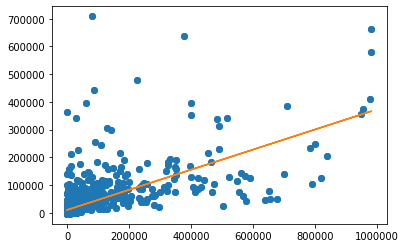

In [142]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_lasso)
plt.plot(tsty,lr_pred_lasso,'o')
m,b = np.polyfit(tsty,lr_pred_lasso,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred_lasso))

In [143]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_lasso))
print('R2:',metrics.r2_score(tsty, lr_pred_lasso))

RMSE: 48700.775363126275
MAE: 14346.315893428793
R2: 0.42962084853972016


In [144]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print(lr_pred_ridge)

[5172.54921929 1765.72993772 -339.84451768 ... 4971.29274755 6537.09359607
 2194.16309735]


In [145]:
np.sqrt(np.mean((np.square(lr_pred_ridge - tsty))))

48700.70943444273

In [146]:
print(tsty - lr_pred_ridge)

37277    -5076.549219
17126    -1489.729938
34866      839.844518
18077    39132.358389
14470   -14884.495962
             ...     
3455      -414.167409
20844      954.810906
38571    -3303.292748
14229    -6229.093596
32631    -1209.163097
Name: 재산피해소계, Length: 5239, dtype: float64


[9.2491814e+12]


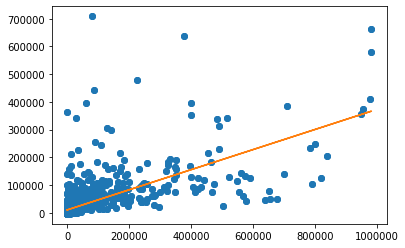

In [147]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_ridge)
plt.plot(tsty,lr_pred_ridge,'o')
m,b = np.polyfit(tsty,lr_pred_ridge,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred_ridge))

In [148]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_ridge))
print('R2:',metrics.r2_score(tsty, lr_pred_ridge))

RMSE: 48700.709434442724
MAE: 14346.463031175886
R2: 0.42962239284043613


In [149]:
print(model.coef_)
print(model_lasso.coef_)
print(model_ridge.coef_)
#회귀계수

[ 1.68705232e+00  9.94135272e+00  1.34464486e+02  4.44243722e+01
 -3.83755485e+00  8.62385741e+01  4.01105242e+03]
[ 1.68714667e+00  9.94154300e+00  1.34464460e+02  4.44246876e+01
 -3.82335325e+00  7.00908129e+01  4.00069205e+03]
[ 1.68704852e+00  9.94137710e+00  1.34464461e+02  4.44245079e+01
 -3.83128254e+00  8.59314586e+01  4.00785562e+03]
